<a href="https://colab.research.google.com/github/hd-nguyen/PetriNet2Vec/blob/main/PetriNet2Vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt install libopenblas-dev
# !pip install scipy==1.14.1
!pip install gensim
!pip install pm4py
!pip install requests
!sudo apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopenblas-dev is already the newest version (0.3.20+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.11.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 56.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.0 MB/s eta 0:00:00
  C

In [3]:
!pip install PetriNet2Vec

In [4]:
import os
import pm4py
from PetriNet2Vec import PetriNet2Vec
pm4py.util.constants.SHOW_PROGRESS_BAR = False
import warnings
warnings.filterwarnings('ignore')
import requests, zipfile, io

#### Download dataset

In [5]:
# The PDC 2023 folder contains the dataset used in the Process Discovery Contest of 2023.
# The dataset contains 96 models stored as .pnml files.
r = requests.get('https://data.4tu.nl/file/afd6f608-469e-48f9-977d-875b45840d39/e8eaeb15-b503-443c-8666-43f3c5261eb2')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("Models")

#### Load the model by pm4py

In [6]:
models = sorted(os.listdir('./Models/'))
petriNets = []
petriNets_im = []
petriNets_fm = []
for model in models:
    net, im, fm = pm4py.read_pnml(os.path.join('./Models/', model))
    petriNets.append(net)
    petriNets_im.append(im)
    petriNets_fm.append(fm)

#### Vector Embedding Learning

In [7]:
pnml2vec = PetriNet2Vec(embedding_dim=8, # '8' minimum acceptable number of embedding dimensions
                        workers=8)       # number of paraller works

pnml2vec.fit(petriNets, epochs=1000)
pnml2vec.save_model("trained_model")

#### Getting Embedding Vector

Embeddings Vector: [ 0.88642913 -0.6654704  -1.6056597   0.7467817  -0.9448138   0.0235386
  1.7157104   0.21477337]

Petri net model:


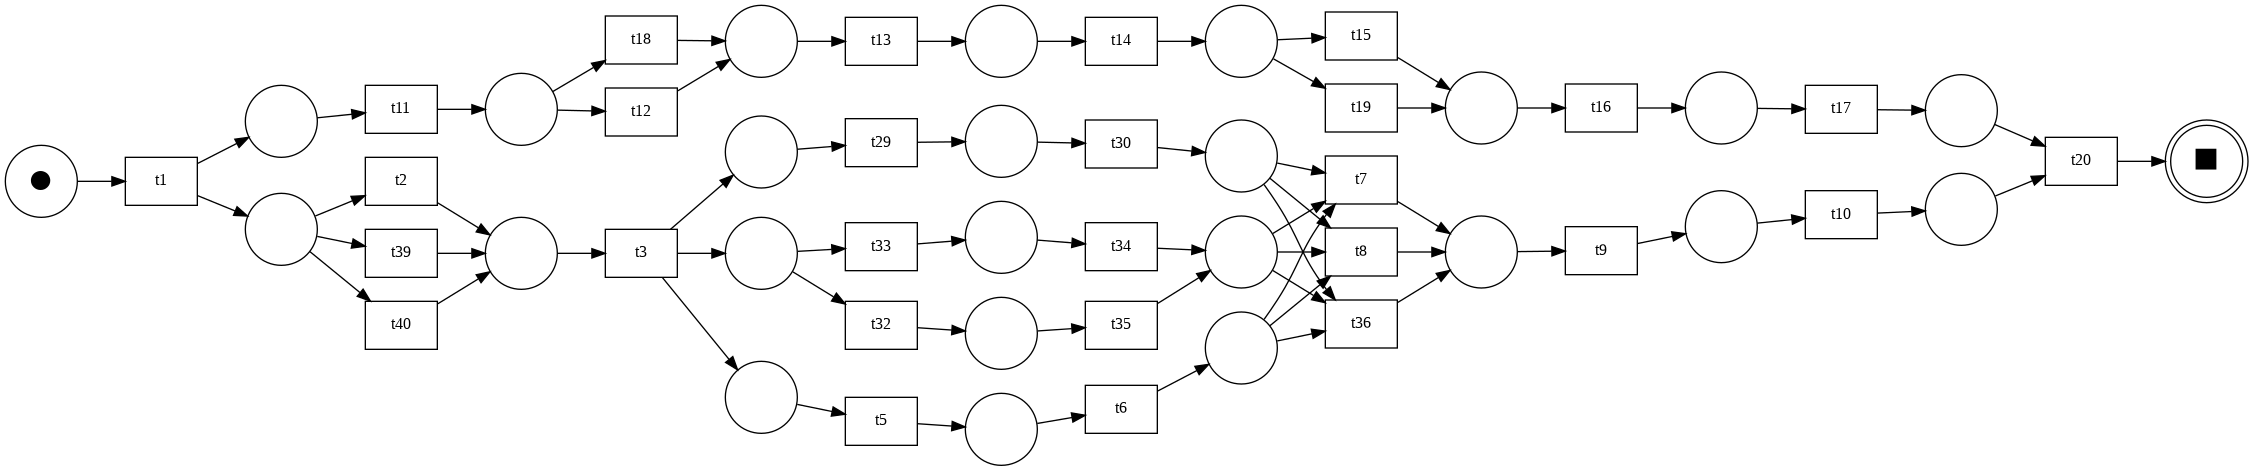

In [8]:
embeddings_vectors = pnml2vec.get_net_embeddings()
# showing the fisrt Petri net and its embedding
print('Embeddings Vector:' ,embeddings_vectors[0])
print('\nPetri net model:')
pm4py.view_petri_net(petriNets[0], petriNets_im[0], petriNets_fm[0])